In [81]:
import pandas as pd

import pandas as pd
from zipfile import ZipFile
import os
import pandas_profiling
from pandas_profiling import ProfileReport
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import multiprocessing
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn
import scipy as sp

from sklearn.decomposition import LatentDirichletAllocation as LDA


In [82]:
df=pd.read_csv("Survey.csv")

In [19]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
df.columns

Index(['Timestamp', 'Username',
       'Which country are you currently located in (Country Name)?',
       'How many years of work experience do you have (including internship experience)?',
       'How do you identify your gender?',
       'On a scale of 1 to 5, how satisfied are you with the work culture of your company? ',
       'On a scale of 1 to 5, do you feel appreciated for the work that you do?',
       'Do you feel you are well-compensated?',
       'On a scale of 1 to 5, do you feel self growth in your current position?',
       'Which city is the University of Washington located in? ',
       'How many meetings do you attend per day?',
       'Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?',
       'Do you feel  connected with your co-workers through meetings?',
       'Do you think that you are affected by work burnout?'],
      dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='How many years of work experience do you have (including internship experience)?', ylabel='count'>

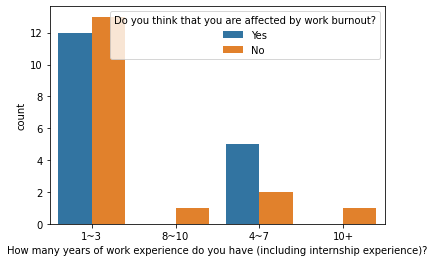

In [84]:
#How many years of experience the employee has with burn out
sns.countplot(data=df,x='How many years of work experience do you have (including internship experience)?', hue="Do you think that you are affected by work burnout?")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Do you feel you are well-compensated?', ylabel='count'>

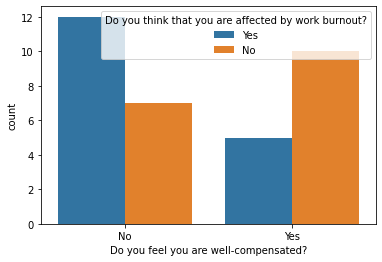

In [85]:
sns.countplot(data=df,x='Do you feel you are well-compensated?', hue="Do you think that you are affected by work burnout?")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='How many meetings do you attend per day?', ylabel='count'>

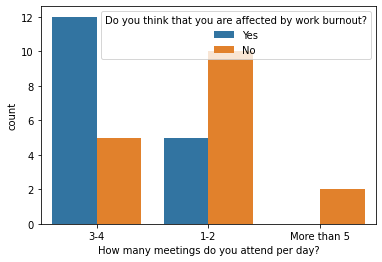

In [86]:

sns.countplot(data=df,x='How many meetings do you attend per day?', hue="Do you think that you are affected by work burnout?")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Do you feel  connected with your co-workers through meetings?', ylabel='count'>

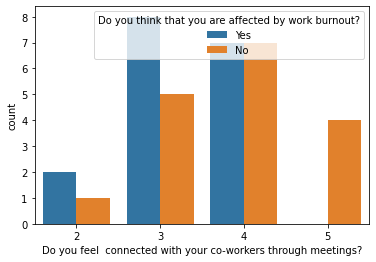

In [87]:

sns.countplot(data=df,x='Do you feel  connected with your co-workers through meetings?', hue="Do you think that you are affected by work burnout?")

In [57]:
#Dropping unwanted columns
df.drop(["Timestamp", "Username","Which country are you currently located in (Country Name)?","Which city is the University of Washington located in? "], axis=1, inplace=True)

In [58]:
df.head()

,How many years of work experience do you have (including internship experience)?,How do you identify your gender?,"On a scale of 1 to 5, how satisfied are you with the work culture of your company?","On a scale of 1 to 5, do you feel appreciated for the work that you do?",Do you feel you are well-compensated?,"On a scale of 1 to 5, do you feel self growth in your current position?",How many meetings do you attend per day?,"Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?",Do you feel connected with your co-workers through meetings?,Do you think that you are affected by work burnout?
0,1~3,Male,3,4,No,4,3-4,26 - 50%,3,Yes
1,1~3,Male,2,3,No,3,1-2,0 - 25%,3,No
2,1~3,Female,4,4,No,3,1-2,26 - 50%,3,Yes
3,8~10,Male,5,5,Yes,5,3-4,51 - 75%,4,No
4,1~3,Male,4,4,No,4,1-2,51 - 75%,5,No


In [59]:
df.columns

Index(['How many years of work experience do you have (including internship experience)?',
       'How do you identify your gender?',
       'On a scale of 1 to 5, how satisfied are you with the work culture of your company? ',
       'On a scale of 1 to 5, do you feel appreciated for the work that you do?',
       'Do you feel you are well-compensated?',
       'On a scale of 1 to 5, do you feel self growth in your current position?',
       'How many meetings do you attend per day?',
       'Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?',
       'Do you feel  connected with your co-workers through meetings?',
       'Do you think that you are affected by work burnout?'],
      dtype='object')

In [60]:
df['Do you feel you are well-compensated?']=df['Do you feel you are well-compensated?'].replace({'No': 0, 'Yes': 1})
df['Do you think that you are affected by work burnout?']=df['Do you think that you are affected by work burnout?'].replace({'No': 0, 'Yes': 1})

In [61]:
df.head()

,How many years of work experience do you have (including internship experience)?,How do you identify your gender?,"On a scale of 1 to 5, how satisfied are you with the work culture of your company?","On a scale of 1 to 5, do you feel appreciated for the work that you do?",Do you feel you are well-compensated?,"On a scale of 1 to 5, do you feel self growth in your current position?",How many meetings do you attend per day?,"Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?",Do you feel connected with your co-workers through meetings?,Do you think that you are affected by work burnout?
0,1~3,Male,3,4,0,4,3-4,26 - 50%,3,1
1,1~3,Male,2,3,0,3,1-2,0 - 25%,3,0
2,1~3,Female,4,4,0,3,1-2,26 - 50%,3,1
3,8~10,Male,5,5,1,5,3-4,51 - 75%,4,0
4,1~3,Male,4,4,0,4,1-2,51 - 75%,5,0


In [62]:
# Applying encoding on categorical variables
df = pd.get_dummies(df, columns=['How do you identify your gender?','How many years of work experience do you have (including internship experience)?', 'How many meetings do you attend per day?','Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?'], drop_first=True)

In [63]:
df.head()

,"On a scale of 1 to 5, how satisfied are you with the work culture of your company?","On a scale of 1 to 5, do you feel appreciated for the work that you do?",Do you feel you are well-compensated?,"On a scale of 1 to 5, do you feel self growth in your current position?",Do you feel connected with your co-workers through meetings?,Do you think that you are affected by work burnout?,How do you identify your gender?_Male,How do you identify your gender?_Prefer not to respond,How many years of work experience do you have (including internship experience)?_1~3,How many years of work experience do you have (including internship experience)?_4~7,How many years of work experience do you have (including internship experience)?_8~10,How many meetings do you attend per day?_3-4,How many meetings do you attend per day?_More than 5,"Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?_26 - 50%","Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?_51 - 75%","Out of the number of meetings you attend each day, what percentage of meetings do you feel are useful?_76 - 100%"
0,3,4,0,4,3,1,1,0,1,0,0,1,0,1,0,0
1,2,3,0,3,3,0,1,0,1,0,0,0,0,0,0,0
2,4,4,0,3,3,1,0,0,1,0,0,0,0,1,0,0
3,5,5,1,5,4,0,1,0,0,0,1,1,0,0,1,0
4,4,4,0,4,5,0,1,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

<AxesSubplot:>

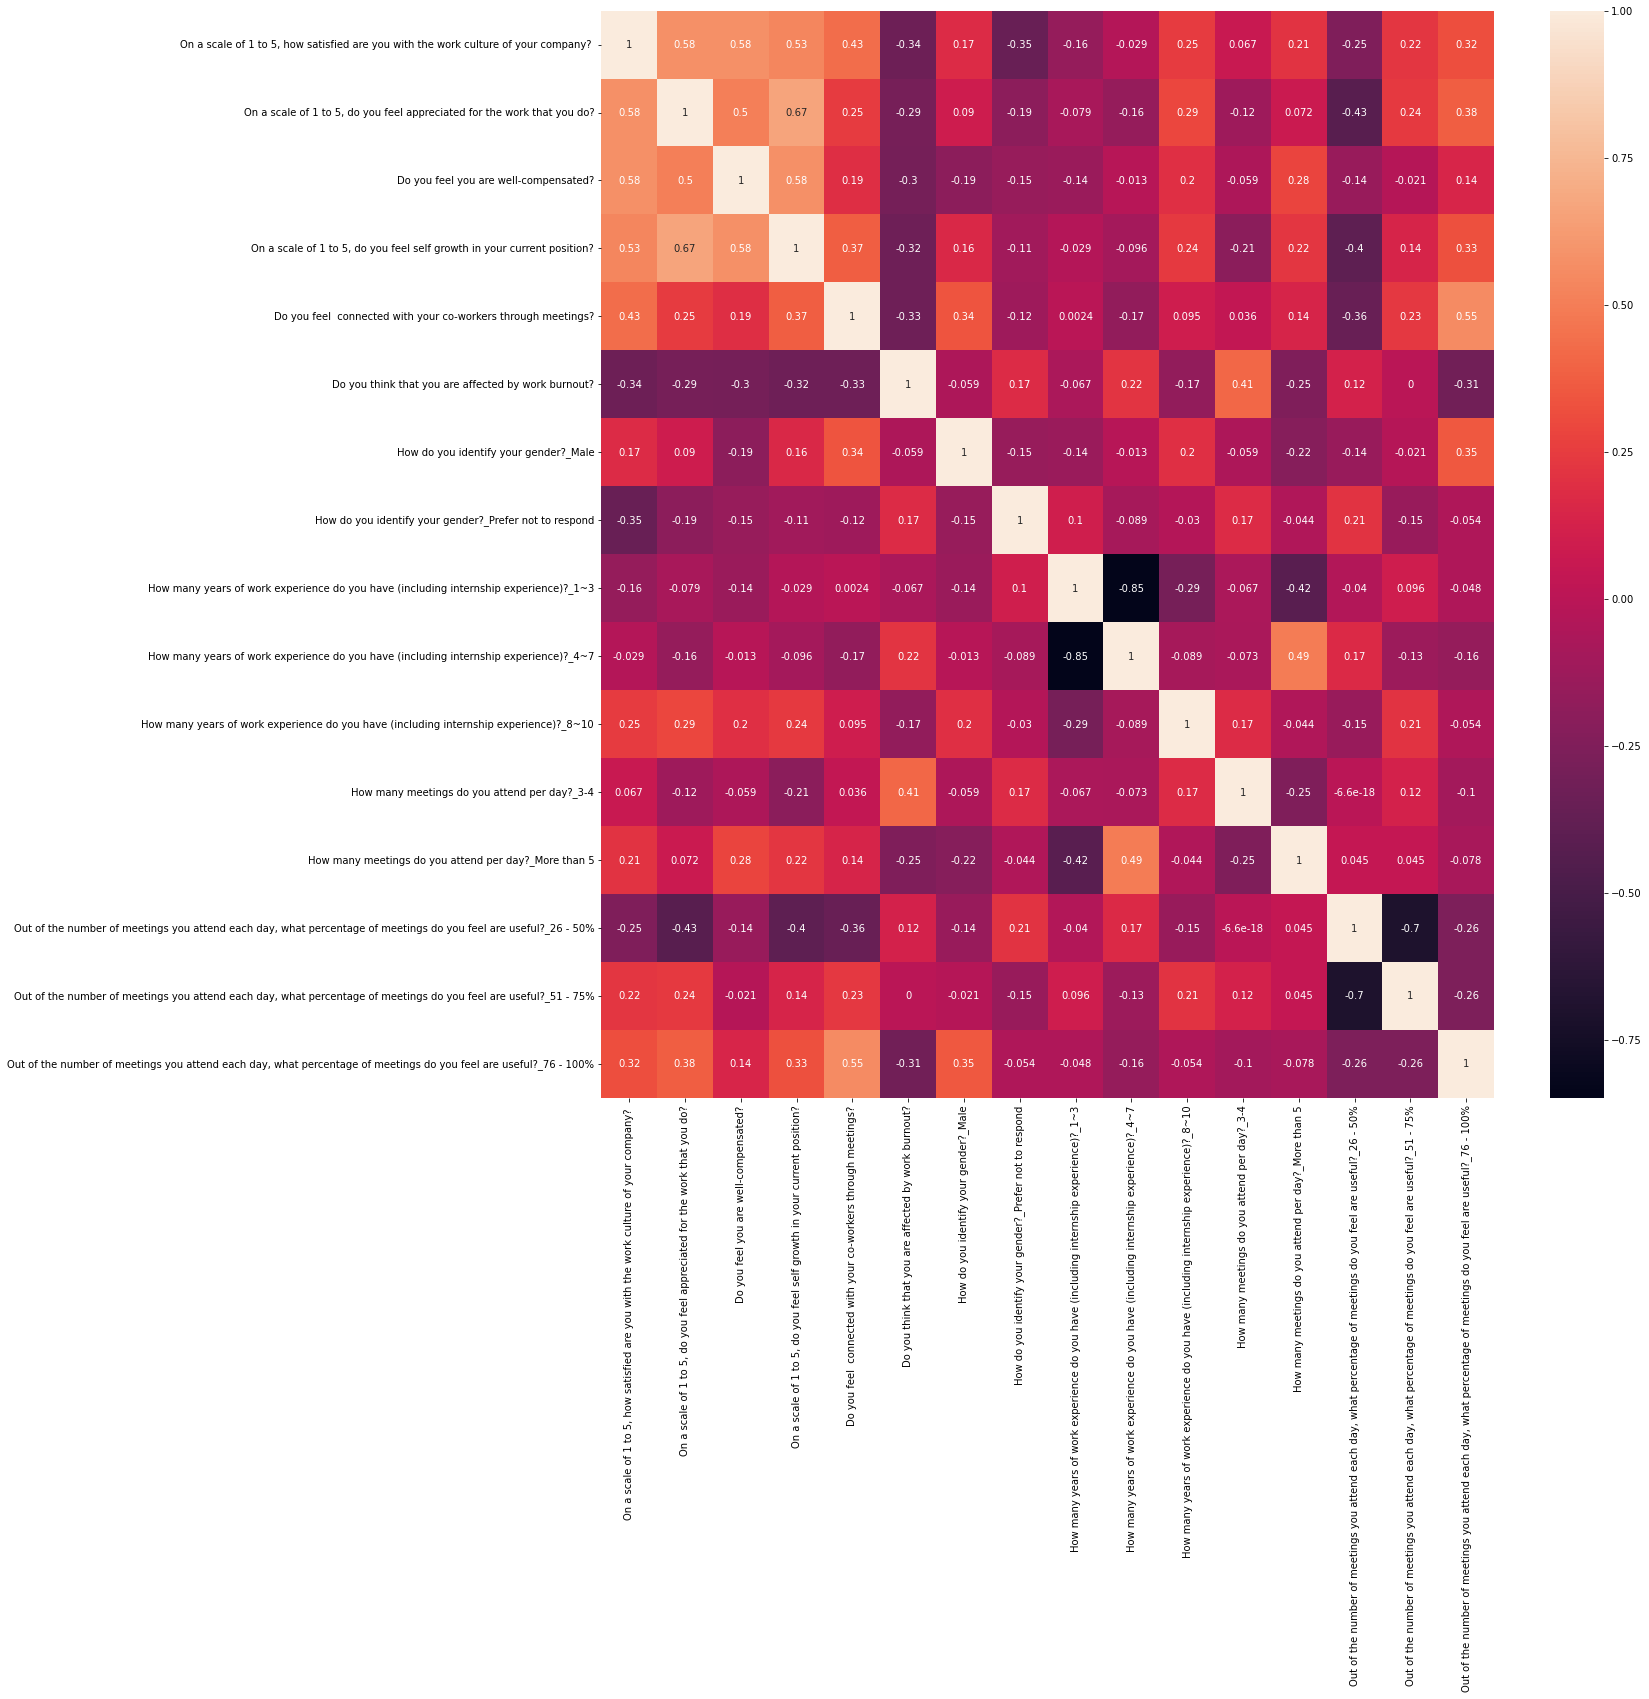

In [64]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
df_corr_top = df_corr.index
sns.heatmap(df[df_corr_top].corr(), annot=True)

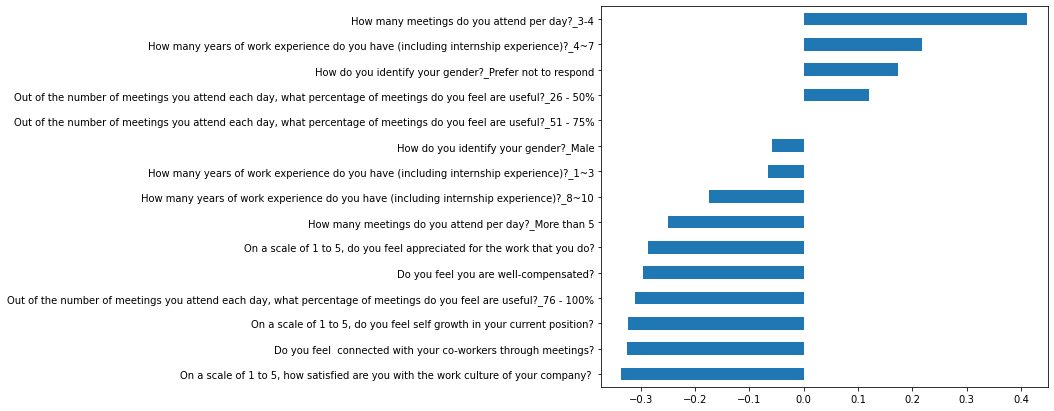

In [65]:
#Plotting correlation for the dependent variable exited
plt.figure(figsize = (8, 7))
df.corr()['Do you think that you are affected by work burnout?'].sort_values().drop("Do you think that you are affected by work burnout?").plot(kind = "barh");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Top 11 Features')

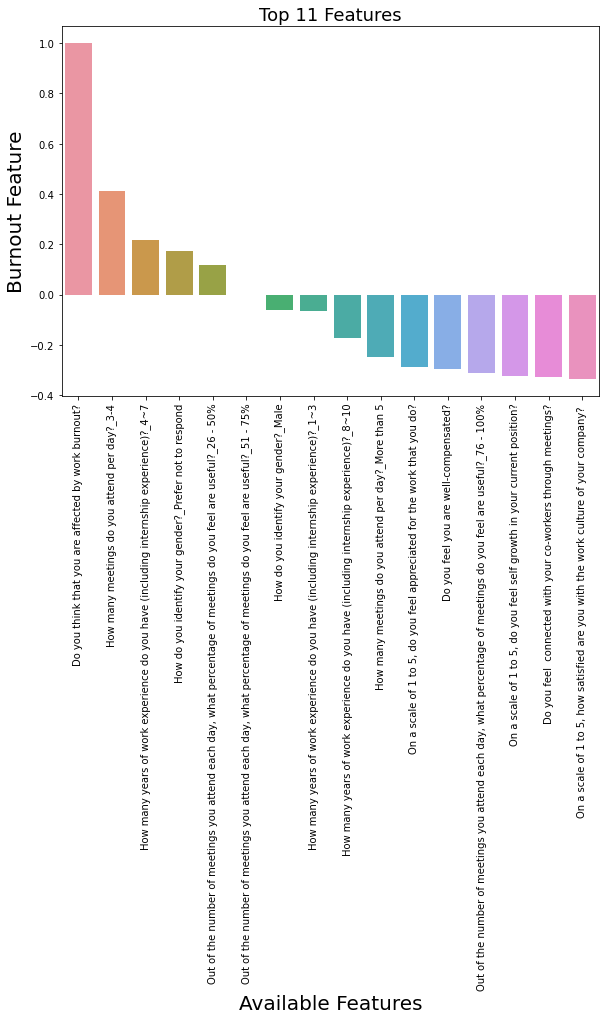

In [66]:
#Identifying top 10 important features
Correlation_mat_temp=df.dropcorr()
#Copying columns names for index
Correlation_mat_temp['Avali_feature'] = Correlation_mat_temp.index

plt.figure(figsize=(12,6))
sns.color_palette("Paired")
sns.barplot(x='Avali_feature',
            y="Do you think that you are affected by work burnout?",  
            order=Correlation_mat_temp.sort_values('Do you think that you are affected by work burnout?', ascending = False).Avali_feature,
            data=Correlation_mat_temp,
           )
plt.xlabel("Available Features", size=20)
plt.ylabel("Burnout Feature", size=20)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Top 11 Features", size=18)

1    17
0    17
Name: Do you think that you are affected by work burnout?, dtype: int64
The total number of employees that are affected by burnout 17
The total number of employees that are not affected by burnout 17


<IPython.core.display.Javascript object>

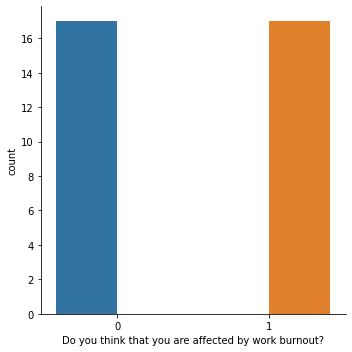

In [69]:
# Plotting graphs for dependent variable  "Do you think that you are affected by work burnout?""
print(df["Do you think that you are affected by work burnout?"].value_counts())

print("\033[1mThe total number of employees that are affected by burnout", df["Do you think that you are affected by work burnout?"].value_counts()[0]) 
print("\033[1mThe total number of employees that are not affected by burnout", df["Do you think that you are affected by work burnout?"].value_counts()[1]) 

#Plotting the number of customers along  HasCrCard variable with exited variable as a filter
sns.catplot(x='Do you think that you are affected by work burnout?',hue='Do you think that you are affected by work burnout?',data=df,kind="count")

<IPython.core.display.Javascript object>

C:\Users\chinm\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


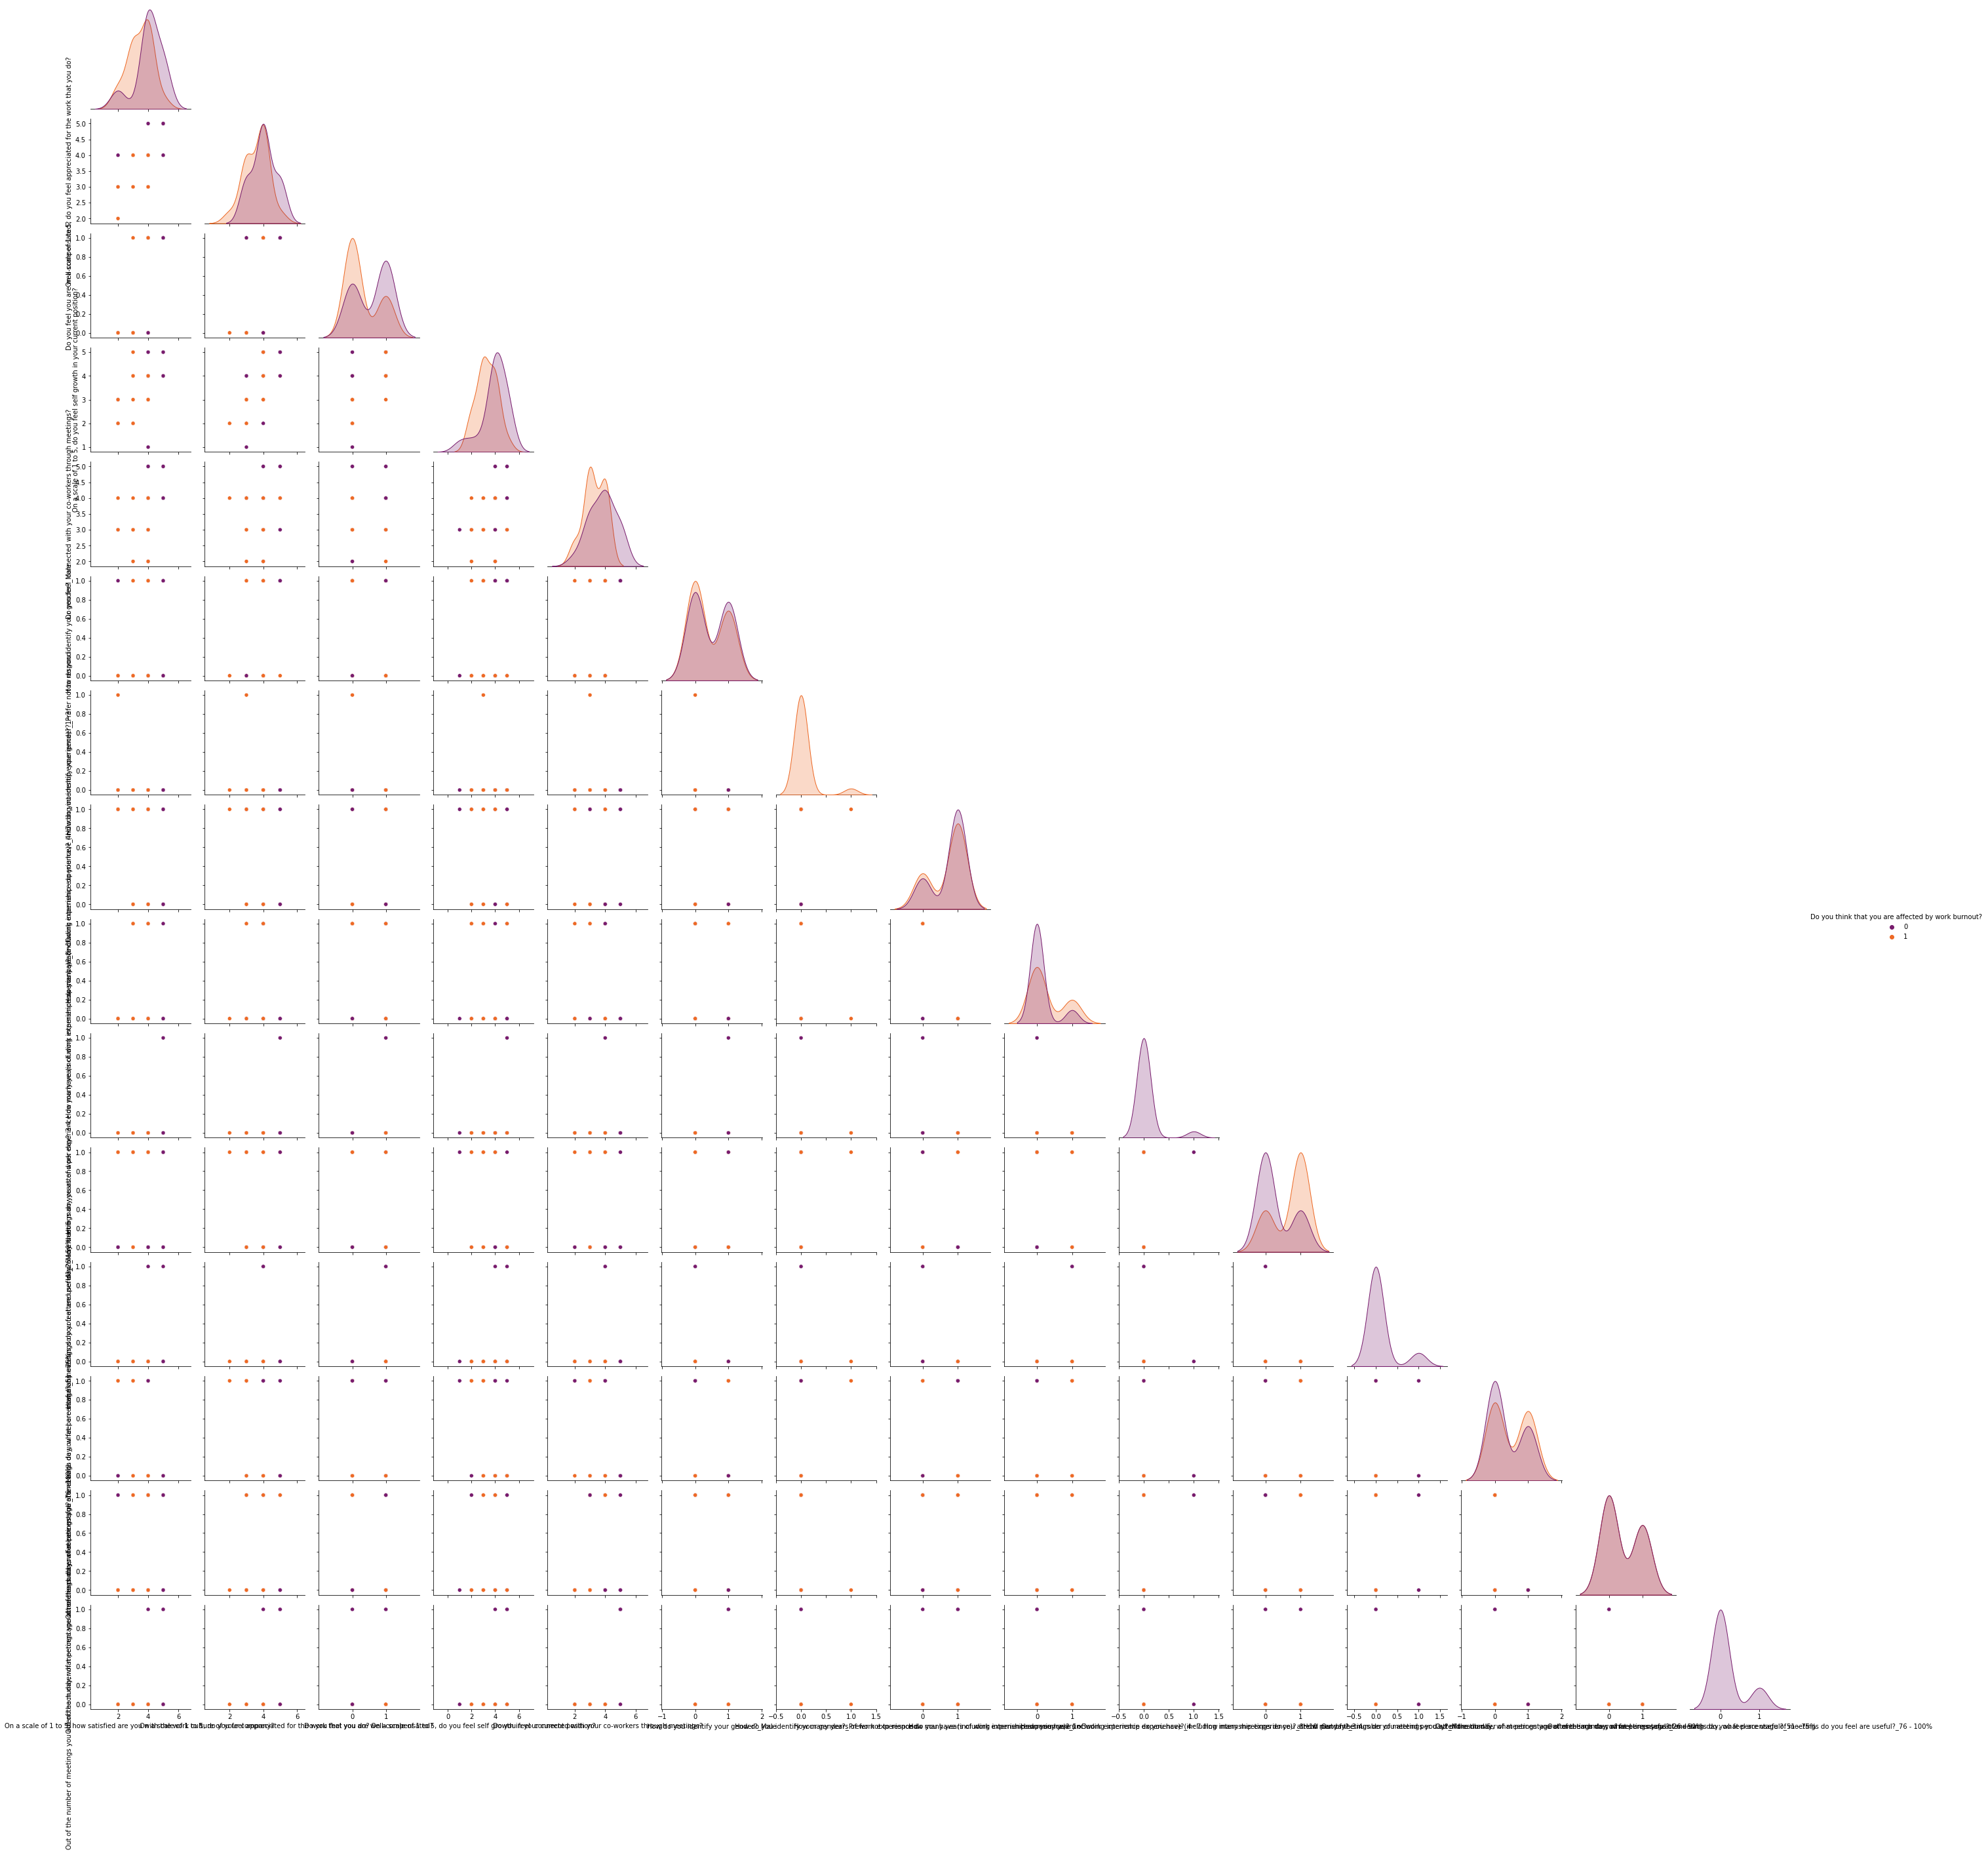

In [72]:
#Printing Pair plots for additional analysis
sns.pairplot(df, hue="Do you think that you are affected by work burnout?", palette="inferno", corner=True);

In [73]:
df.columns

Index(['On a scale of 1 to 5, how satisfied are you with the work culture of your company? ',
       'On a scale of 1 to 5, do you feel appreciated for the work that you do?',
       'Do you feel you are well-compensated?',
       'On a scale of 1 to 5, do you feel self growth in your current position?',
       'Do you feel  connected with your co-workers through meetings?',
       'Do you think that you are affected by work burnout?',
       'How do you identify your gender?_Male',
       'How do you identify your gender?_Prefer not to respond',
       'How many years of work experience do you have (including internship experience)?_1~3',
       'How many years of work experience do you have (including internship experience)?_4~7',
       'How many years of work experience do you have (including internship experience)?_8~10',
       'How many meetings do you attend per day?_3-4',
       'How many meetings do you attend per day?_More than 5',
       'Out of the number of meetings you a

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='On a scale of 1 to 5, how satisfied are you with the work culture of your company? ', ylabel='On a scale of 1 to 5, do you feel self growth in your current position?'>

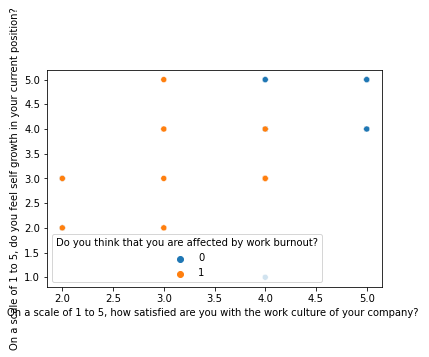

In [77]:
sns.scatterplot(data=df, hue="Do you think that you are affected by work burnout?", x='On a scale of 1 to 5, how satisfied are you with the work culture of your company? ', y='On a scale of 1 to 5, do you feel self growth in your current position?')